In [1]:
# Part 1 (a)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
def target_distribution(x):
    """The given probability density function."""
    return (1/2) * np.exp(-np.abs(x))

In [39]:
def metropolis_hastings(N, s, x0=0):
    """Random Walk Metropolis-Hastings Algorithm."""
    samples = np.zeros(N)
    samples[0] = x0
    for i in range(1, N):
        x_star = np.random.normal(samples[i-1], s)
        acceptance_ratio = target_distribution(x_star) / target_distribution(samples[i-1])
        u = np.random.uniform(0,1)
        if np.log(u) < np.log(acceptance_ratio):
            samples[i] = x_star
        else:
            samples[i] = samples[i-1]
    return samples


In [41]:
# The values set for all parameters
N = 10000
s = 1
samples = metropolis_hastings(N, s)

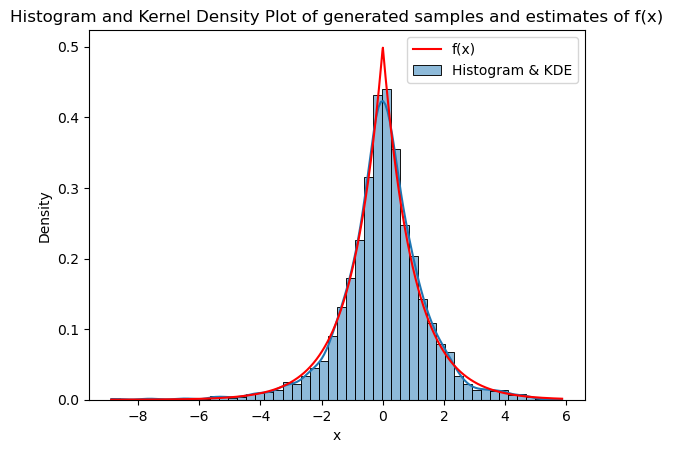

In [45]:
# Plotting histogram and kernel density plot of the generated samples 
sns.histplot(samples, bins=50, kde=True, stat="density", label="Histogram & KDE")
x_vals = np.linspace(min(samples), max(samples), 1000)
plt.plot(x_vals, target_distribution(x_vals), label="f(x)", color="red")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.title("Histogram and Kernel Density Plot of generated samples and estimates of f(x)")
plt.show()

In [11]:
# Monte Carlo estimates
mean_estimate = np.mean(samples)
std_estimate = np.std(samples)
print(f"Monte Carlo Estimate of Mean: {mean_estimate}")
print(f"Monte Carlo Estimate of Standard Deviation: {std_estimate}")


Monte Carlo Estimate of Mean: 0.029211338153995115
Monte Carlo Estimate of Standard Deviation: 1.3650095620880391


In [13]:
# Computing R-hat diagnostic
def compute_rhat(N, s, J):
    """Computes the R-hat diagnostic for the multiple chains."""
    chains = [metropolis_hastings(N, s, x0=np.random.normal()) for _ in range(J)]
    means = np.mean(chains, axis=1)
    variances = np.var(chains, axis=1, ddof=1)
    W = np.mean(variances)
    B = np.var(means, ddof=1)
    return np.sqrt((B + W) / W)

In [15]:
# R-hat values over different s values between 0.001 and 1
s_values = np.linspace(0.001, 1, 20)
Rhat_values = [compute_rhat(2000, s, 4) for s in s_values]


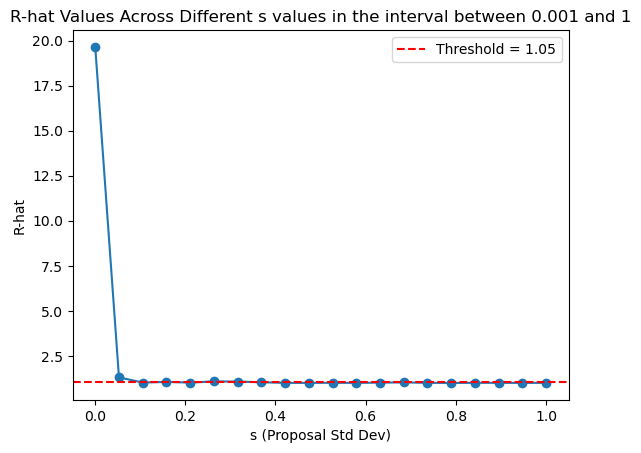

In [26]:
plt.plot(s_values, Rhat_values, marker='o')
plt.axhline(1.05, color='red', linestyle='dashed', label='Threshold = 1.05')
plt.xlabel("s (Proposal Std Dev)")
plt.ylabel("R-hat")
plt.title("R-hat Values Across Different s values in the interval between 0.001 and 1")
plt.legend()
plt.show()